# Regressão Linear - Predição da Idade
### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ler os arquivos ".CSV"

In [2]:
df_train = pd.read_csv('CSVs/titanic/train.csv')
df_test = pd.read_csv('CSVs/titanic/test.csv')

### Transformar e definir o ID do Passageiro como Index

In [3]:
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

### Verificar o Shape dos dois

In [4]:
df_train.shape, df_test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [5]:
df_test['Survived'] = np.nan
df_train.shape, df_test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [6]:
df = pd.concat([df_train, df_test], sort=False)
df.shape

(1309, 11)

In [7]:
df.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade',
              'IrmaosConjuge', 'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [8]:
df['Sexo'].replace(['male', 'female'],['homem', 'mulher'], inplace=True)

In [9]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

In [11]:
df.drop('Cabine', axis=1, inplace=True)
df.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

In [12]:
df['Embarque'].fillna(df['Embarque'].mode()[0], inplace=True)
df.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

In [13]:
df['Tarifa'].fillna(df['Tarifa'].mean(), inplace=True)
df.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

In [14]:
df.corr().style.background_gradient(cmap='OrRd')

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


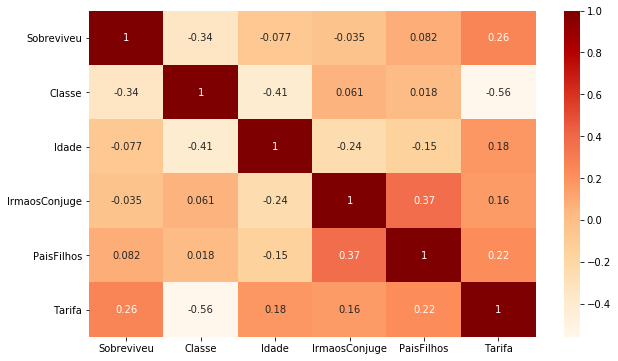

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='OrRd')
plt.show()

In [16]:
df.drop('Sobreviveu', axis=1, inplace=True)
df.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

## Engenharia de Recursos I

In [17]:
df['Titulo'] = df['Nome'].str.extract('([a-zA-Z]+)\.')
df['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [18]:
df['Titulo'] = df['Titulo']\
.apply(lambda x: 'Outros' if x not in ['Mr', 'Mrs', 'Miss', 'Master'] else x)
pd.crosstab(df['Titulo'], df['Sexo']) \
.style.background_gradient(cmap='OrRd')

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [19]:
df['Titulo'] = df['Titulo'].map({'Master':'Menino','Miss':'Solteira',
                                 'Mr':'Adulto', 'Mrs':'Casada'})

pd.crosstab(df['Titulo'], df['Sexo']) \
.style.background_gradient(cmap='OrRd')

Sexo,homem,mulher
Titulo,,
Adulto,757,0
Casada,0,197
Menino,61,0
Solteira,0,260


### Averiguar informações do DataFrame

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [21]:
df.drop(['Bilhete','Nome'], axis=1, inplace=True)
df.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,Adulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,Adulto


## Engenharia de Recursos II
### Estudar a possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "Solteira" e está com os "pais"

In [22]:
df.loc[(df['Titulo'] == 'Solteira') & (df['PaisFilhos'] >= 1)]['Idade'].mean()

12.178815789473683

In [23]:
df.loc[(df['Titulo'] == 'Solteira') & (df['PaisFilhos'] == 0)]['Idade'].mean()

27.21641791044776

In [24]:
df.loc[(df['Titulo'] == 'Casada')]['Idade'].mean()

36.99411764705882

### Verificar distribuição da idade

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


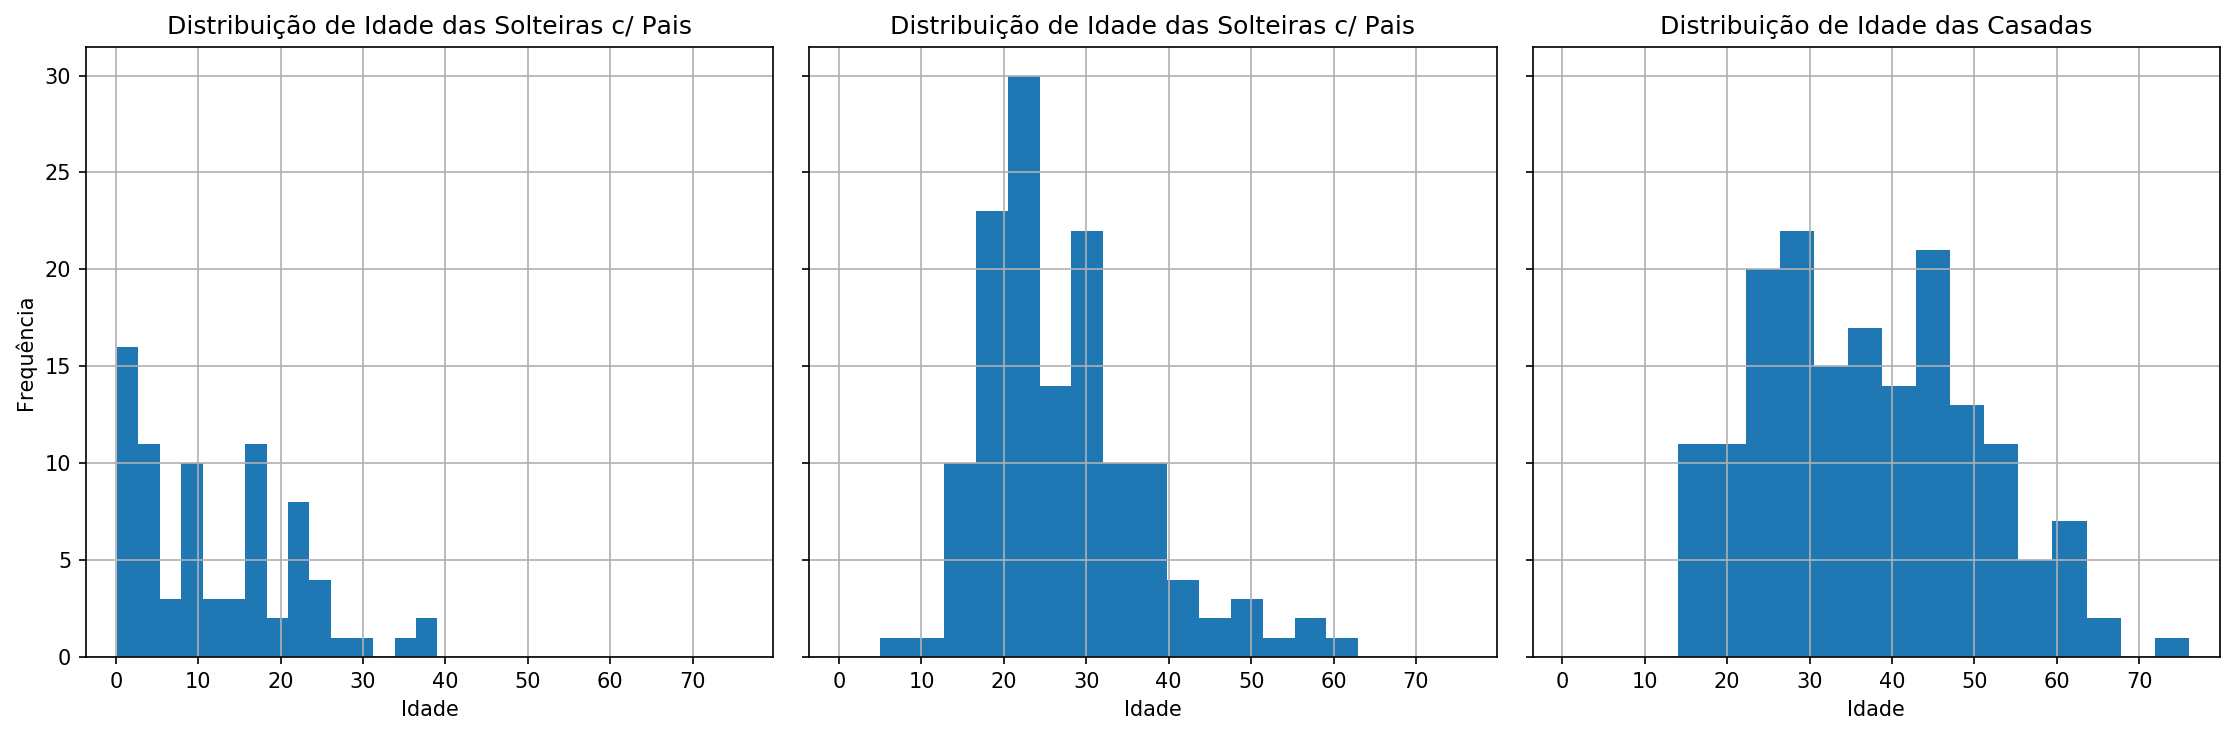

In [25]:
f, ax = plt.subplots(1,3, figsize=(15,5), dpi=150, sharey=True, sharex=True)

ax[0].hist(df.loc[(df['Titulo'] == 'Solteira') & (df['PaisFilhos'] >= 1)]['Idade'],
        bins=15)
ax[0].set(title='Distribuição de Idade das Solteiras c/ Pais',
         xlabel='Idade', ylabel='Frequência')
ax[0].grid()

ax[1].hist(df.loc[(df['Titulo'] == 'Solteira') & (df['PaisFilhos'] == 0)]['Idade'],
        bins=15)
ax[1].set(title='Distribuição de Idade das Solteiras c/ Pais',
         xlabel='Idade')
ax[1].grid()

ax[2].hist(df.loc[(df['Titulo'] == 'Casada')]['Idade'],
        bins=15)
ax[2].set(title='Distribuição de Idade das Casadas',
         xlabel='Idade')
ax[2].grid()

plt.tight_layout()
plt.show()

In [26]:
df['SolteiraPais'] = 0
for idx, _ in df.iterrows():
    if idx in df.loc[(df['Titulo'] == 'Solteira') & (df['PaisFilhos'] >= 1)].index.values:
        df['SolteiraPais'].at[idx] = 1
        
df[df['SolteiraPais']==1].head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,SolteiraPais
PassengerId,,,,,,,,,
11,3,mulher,4.0,1,1,16.7000,S,Solteira,1
25,3,mulher,8.0,3,1,21.0750,S,Solteira,1
44,2,mulher,3.0,1,2,41.5792,C,Solteira,1
59,2,mulher,5.0,1,2,27.7500,S,Solteira,1
69,3,mulher,17.0,4,2,7.9250,S,Solteira,1


In [27]:
df.loc[(df['SolteiraPais'] == 1)]['Idade'].mean()

12.178815789473683

In [28]:
df.loc[(df['SolteiraPais'] == 0)]['Idade'].mean()

31.26812371134021

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


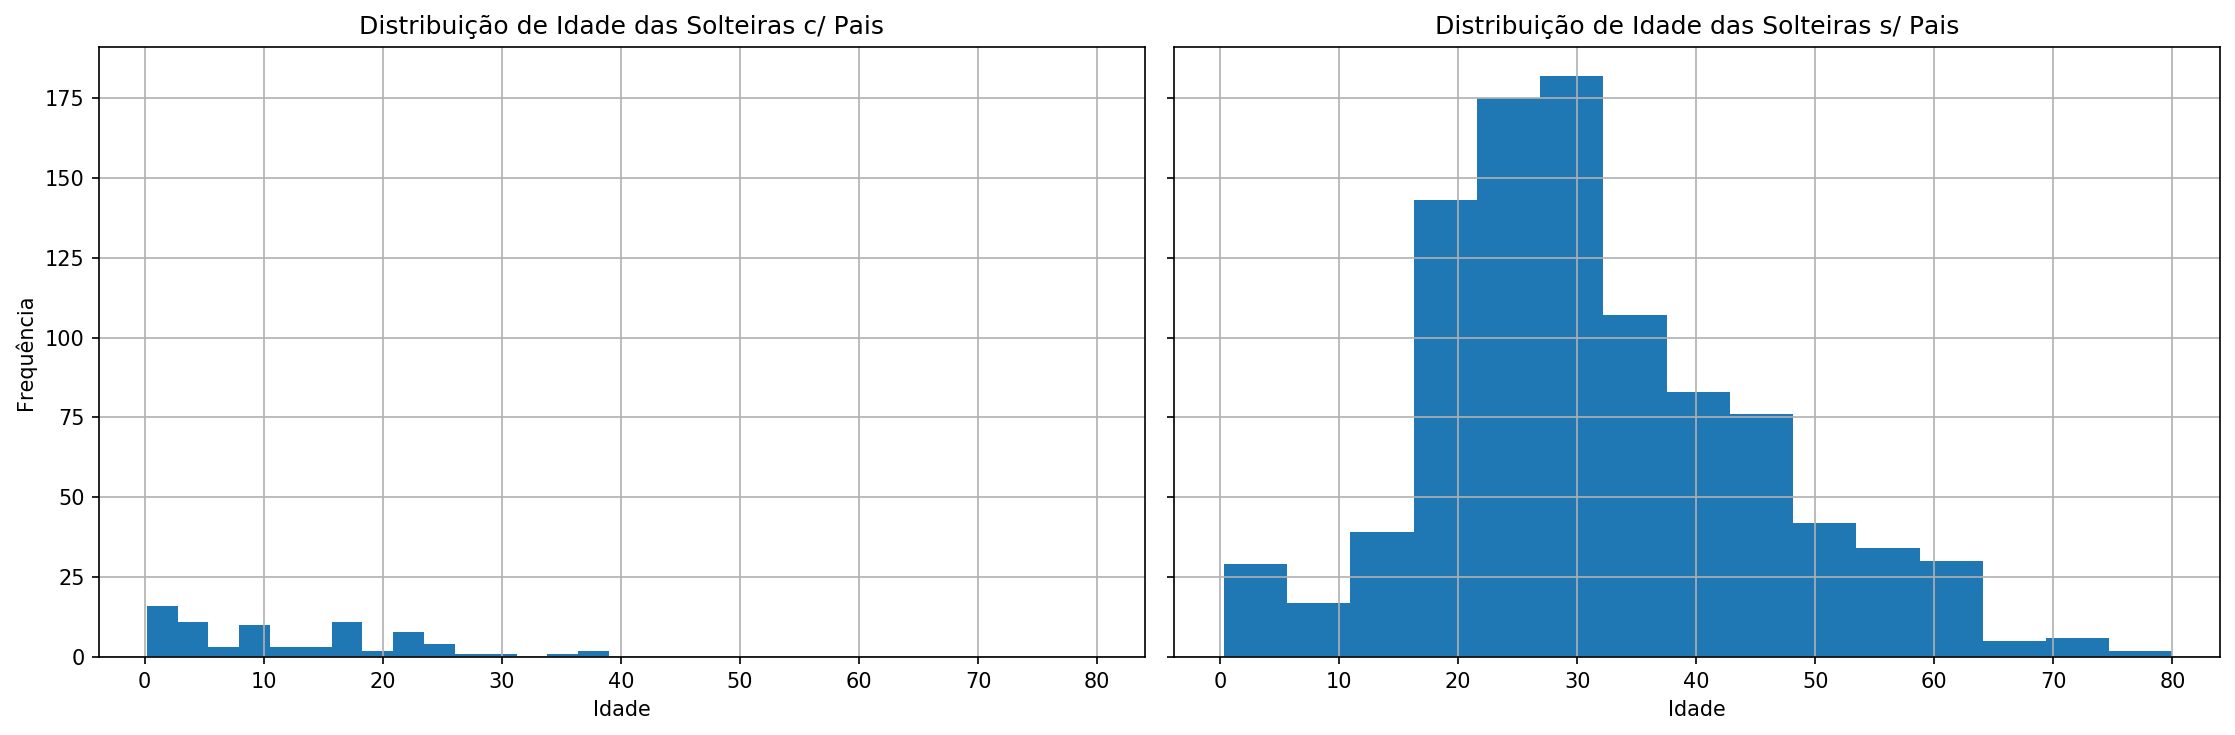

In [29]:
f, ax = plt.subplots(1,2, figsize=(15,5), dpi=150, sharey=True, sharex=True)

ax[0].hist(df.loc[(df['SolteiraPais'] == 1)]['Idade'],
        bins=15)
ax[0].set(title='Distribuição de Idade das Solteiras c/ Pais',
         xlabel='Idade', ylabel='Frequência')
ax[0].grid()

ax[1].hist(df.loc[(df['SolteiraPais'] == 0)]['Idade'],
        bins=15)
ax[1].set(title='Distribuição de Idade das Solteiras s/ Pais',
         xlabel='Idade')
ax[1].grid()

plt.tight_layout()
plt.show()

### Transformar recursos categórios em "dummies"

In [30]:
df['Sexo'] = df['Sexo'].map({'homem':0,'mulher':1})

In [31]:
df.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,SolteiraPais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,Adulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,Adulto,0


In [32]:
df.describe(include='O').columns.values

array(['Embarque', 'Titulo'], dtype=object)

In [33]:
df = pd.get_dummies(df, columns=['Classe']+list(df.describe(include='O').columns.values),
                    drop_first=True)
df.head()

,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,SolteiraPais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_Casada,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,0


In [34]:
df.shape

(1309, 13)

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [35]:
df.isnull().sum()

Sexo                 0
Idade              263
IrmaosConjuge        0
PaisFilhos           0
Tarifa               0
SolteiraPais         0
Classe_2             0
Classe_3             0
Embarque_Q           0
Embarque_S           0
Titulo_Casada        0
Titulo_Menino        0
Titulo_Solteira      0
dtype: int64

In [36]:
train_idade = df.dropna()
test_idade = df.loc[df['Idade'].isnull()].drop('Idade', axis=1)
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

### Definir X e y para treinar o modelo

In [37]:
X = train_idade.drop('Idade', axis=1)
y = train_idade['Idade']
X.shape, y.shape

((1046, 12), (1046,))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [39]:
regressor = LinearRegression()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [41]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [42]:
X_test.shape, y_test.shape

((314, 12), (314,))

In [43]:
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
mse = mean_squared_error(prediction, y_test)
mse

106.99112001968994

In [44]:
rmse = mse**0.5
rmse

10.343651193833344

In [45]:
regressor.score(X_test, y_test)

0.48256715982918497

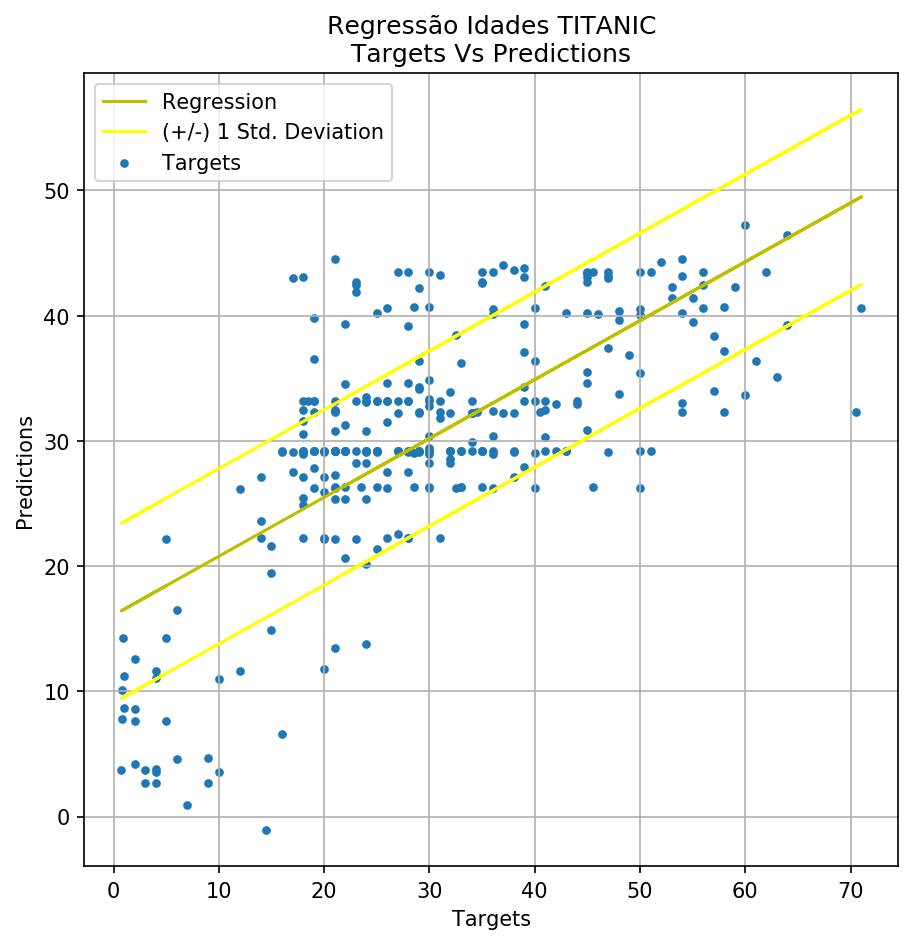

In [46]:
from model.Regression import Regression
reg = Regression()
reg.set_data(y_test, prediction)
reg.plot_regression('Regressão Idades TITANIC',['Targets', 'Predictions'],1)

In [47]:
const = reg.b
const

16.07731582091399

In [48]:
x1 = reg.m
x1

0.470386954974518

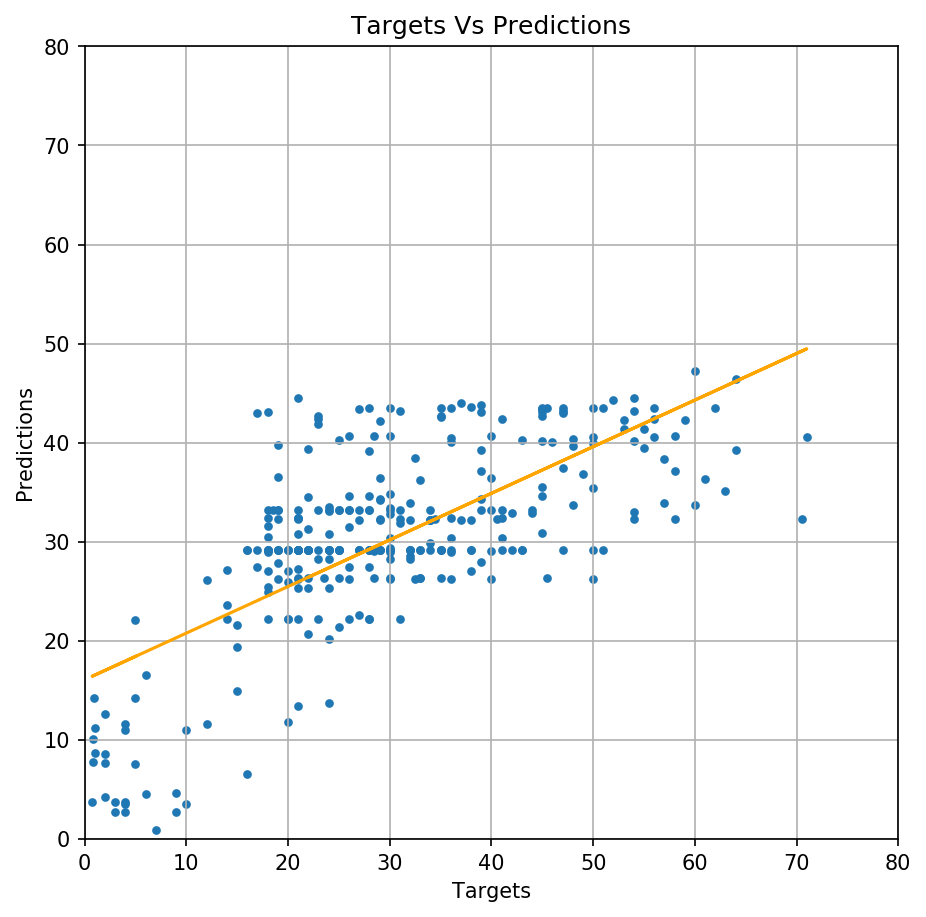

In [49]:
yhat =  x1 * y_test + const
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.set_dpi(150)

plt.scatter(y_test, prediction, s=10)
plt.plot(y_test, yhat, color='orange')
plt.xlim(0,80)
plt.ylim(0,80)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.title('Targets Vs Predictions')
plt.grid()
plt.show()

In [50]:
test_idade['Idade'] = regressor.predict(test_idade)

In [51]:
test_idade.isnull().sum()

Sexo               0
IrmaosConjuge      0
PaisFilhos         0
Tarifa             0
SolteiraPais       0
Classe_2           0
Classe_3           0
Embarque_Q         0
Embarque_S         0
Titulo_Casada      0
Titulo_Menino      0
Titulo_Solteira    0
Idade              0
dtype: int64

### Concatenar dados

In [52]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

In [54]:
idade = pd.concat([train_idade, test_idade], sort=False)

In [55]:
idade.isnull().sum()

Sexo               0
Idade              0
IrmaosConjuge      0
PaisFilhos         0
Tarifa             0
SolteiraPais       0
Classe_2           0
Classe_3           0
Embarque_Q         0
Embarque_S         0
Titulo_Casada      0
Titulo_Menino      0
Titulo_Solteira    0
dtype: int64

In [56]:
idade.shape

(1309, 13)

In [57]:
idade_completa = pd.DataFrame({'IdPassageiro':idade.index, 'Idade':idade['Idade']})
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.371726
1302,1302,25.371370
1305,1305,29.153974


In [58]:
idade_completa.to_csv('CSVs/titanic/idade_comleta.csv', index=False)